# ĐỒ ÁN CUỐI KỲ MÔN HỌC NHẬP MÔN KHOA HỌC DỮ LIỆU

### GVHD: TRẦN TRUNG KIÊN

#### Danh sách thành viên nhóm: STT nhóm 08
1. 1712892: Nguyễn Thị Tuyết
2. 1712704: Nguyễn Phước Quang

## I. TỔNG QUAN VỀ ĐỒ ÁN

 ## Đề tài: Phân tích và mô hình hóa dữ liệu đánh giá phim trên website
 


# II. TIẾN HÀNH PHÂN TÍCH DỮ LIỆU

## 1. Lấy dữ liệu:


In [2]:
#  import cac thuc vien
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import re
import time as t

In [3]:
per_page=1
url = f'https://www.imdb.com/search/title/?title_type=feature&amp&release_date=1995-10-10,2020-12-12&amp&start={per_page}&amp&ref_=adv_nxt'
html_text = requests.get(url).text
tree= BeautifulSoup(html_text, 'html.parser')

In [4]:
films = tree.find_all('div', {'class': 'lister-item-content'})
test=tree.find_all('div',class_="desc")


In [5]:
# các biến dùng để lưu các thuộc tính của bộ phim
list_title = []
duration = []
category = []
scores = []
score_voting=[]
amount_vote=[]
amount_gross=[]
check=True
i=1
while(i<10000): 
  url = f'https://www.imdb.com/search/title/?title_type=feature&amp&release_date=1995-10-10,2020-12-12&amp&start={i}&amp&ref_=adv_nxt'
  html_text = requests.get(url).text
  tree= BeautifulSoup(html_text, 'html.parser')
  films = tree.find_all('div', {'class': 'lister-item-content'})
  for film in films:

    # lay ten film
    temp=film
    title=temp.find('a').get_text().replace('\n','').replace('\t','')
    #print(title)
    list_title.append(title)

    try:
      # lay  thoi gian cua film
      head=temp.find_all(class_ = "text-muted")
      time=head[1]
      runtime = time.find(class_="runtime").get_text()
      runtime = re.findall("[0-9]+", runtime)
      runtime=int(runtime[0])
      duration.append(runtime)
      #print(runtime)
    except:
      duration.append(np.nan)
    # lay the loai film
    
    try:
      genre = time.find(class_= "genre").get_text()
      genre=genre.lstrip("\n").rstrip("\n").replace('\n','').replace('\t','')
      #print(genre)
      category.append(genre)
    except:
      category.append(np.nan)

    try: 
      # lay diem  danh gia vote
      voting=temp.find(class_="inline-block ratings-imdb-rating").get_text()

      voting=float(voting.lstrip("\n"))
      #print(voting)
      score_voting.append(voting)
    except:
      score_voting.append(np.nan)
    # lay diem Metascore

    try: 
      meta_score=temp.find(class_="inline-block ratings-metascore").get_text()
      meta_score =re.findall("[0-9]+", meta_score)
      meta_score=(int)(meta_score[0])
      #print(meta_score)
      scores.append(meta_score)
    except:
      scores.append(np.nan)
    # lay number vote
    try:
      number_votes=temp.find(class_="sort-num_votes-visible").find_all("span")[1].get_text()
      number_votes=(int)(number_votes.replace(',',''))
      amount_vote.append(number_votes)
      #print(number_votes)
    except:
      amount_vote.append(np.nan)
    # lay danh thu  film
    try:
      gross=temp.find(class_="sort-num_votes-visible").find_all("span")[4].get_text()
      gross=gross.lstrip("$").rstrip("M")
      amount_gross.append(gross)
      #print((float)(gross))
    except:
      amount_gross.append(np.nan)

  # kiem tra trang ke tiep
  i=i+50
  #print(i)
  t.sleep(1)
  
 
# viết dữ liệu xuống file csv
data=[list_title,duration,category,scores,score_voting,amount_vote,amount_gross]
a=np.array(data)
dataset = pd.DataFrame({'Title': list_title, 'Category': category,'Duration':duration,'Socres':scores,'Score_voting':score_voting,'Amount_vote':amount_vote,'Amount_gross':amount_gross})
dataset.to_csv("final_data.csv.csv",sep=',')

## 2. Khám phá dữ liệu:

**Import các thư viện cần thiết**

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import set_config
#set_config(display='diagram') # Để trực quan hóa pipeline

# You can also import other things ...
# YOUR CODE HERE (OPTION)

**Thiết lập màn hình để dữ liệu được hiển thị đầy đủ hơn**

In [8]:
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Đọc dữ liệu từ file final_data.csv vào Dataframe**

In [9]:
data_df = pd.read_csv('final_data.csv',index_col=0)
data_df.head()

,Title,Category,Duration,Socres,Score_voting,Amount_vote,Amount_gross
0,Soul,"Animation, Adventure, Comedy",100.0,83.0,8.1,125096.0,NaN
1,Tenet,"Action, Sci-Fi, Thriller",150.0,69.0,7.5,262670.0,53.8
2,Shadow in the Cloud,"Action, Horror, War",83.0,66.0,4.7,7206.0,NaN
3,Pieces of a Woman,Drama,126.0,67.0,7.1,10880.0,NaN
4,The Midnight Sky,"Drama, Fantasy, Sci-Fi",118.0,58.0,5.6,55670.0,NaN


**Tiền xử lý: đổi tên cột bị sai tên, thiết lập lại cột index là Title, xóa bỏ khoảng trống phía sau mỗi dữ liệu ở cột Category**

In [10]:
data_df.rename(columns={'Socres':'Scores'}, inplace = True)
data_df['Category'] = data_df['Category'].str.replace(' ', '')
data_df.set_index('Title', inplace=True)
data_df

,Category,Duration,Scores,Score_voting,Amount_vote,Amount_gross
Title,,,,,,
Soul,"Animation,Adventure,Comedy",100.0,83.0,8.1,125096.0,NaN
Tenet,"Action,Sci-Fi,Thriller",150.0,69.0,7.5,262670.0,53.80
Shadow in the Cloud,"Action,Horror,War",83.0,66.0,4.7,7206.0,NaN
Pieces of a Woman,Drama,126.0,67.0,7.1,10880.0,NaN
The Midnight Sky,"Drama,Fantasy,Sci-Fi",118.0,58.0,5.6,55670.0,NaN
...,...,...,...,...,...,...
Permanent Midnight,"Biography,Drama,Romance",88.0,57.0,6.3,6954.0,1.17
Tenderness,"Crime,Drama,Thriller",101.0,NaN,5.5,7578.0,NaN
Babysitting,Comedy,85.0,NaN,6.8,9229.0,NaN


**Vẽ biểu đồ dữ liệu của từng cột trong dataframe để quan sát dữ liệu được dễ dàng hơn**

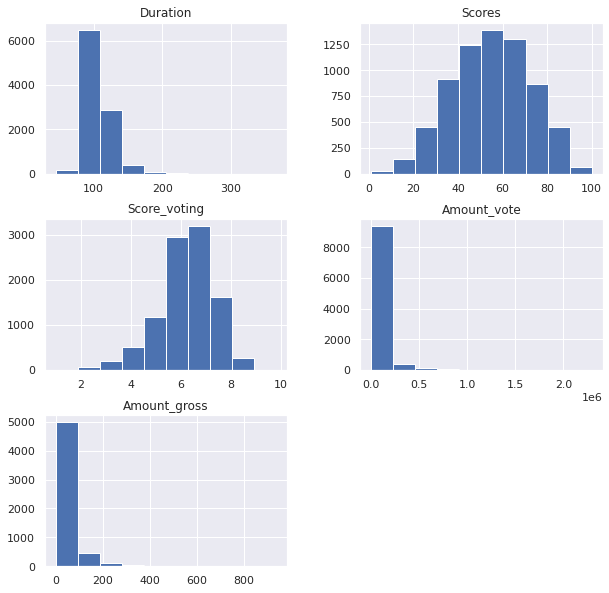

In [11]:
sns.set()
data_df.hist(figsize=(10,10))
plt.show()

### Dữ liệu trên có bao nhiêu dòng, bao nhiêu cột ?

In [12]:
num_rows_df, num_columns_df = data_df.shape
print("Dữ liệu trên có {0} dòng và {1} cột".format(num_rows_df, num_columns_df))

Dữ liệu trên có 10000 dòng và 6 cột


### Mỗi dòng, mỗi cột có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Dưới đây là phần mô tả về các cột của file "final_data.csv":
- **Title**: tên của bộ phim 
- **Category**: thể loại của bộ phim 
- **Duration**: thời gian của bộ phim
- **Scores**: điểm của bộ phim
- **Score_voting**: điểm  voting 
- **Amount_vote**: số lượng voting
- **Amount_gross**: danh thu của bộ phim

Nhìn vào dữ liệu ở `data_df`, ta có thể thấy là mỗi dòng ứng với một danh sách thông tin của một bộ phim anime được đăng tải trên website, và không có xuất hiện trường hợp dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [13]:
data_df.index.duplicated().sum()

255

**Tiền xử lý: loại bỏ dòng có dữ liệu bị lặp, giữ lại dòng đầu tiên**

In [14]:
data_df = data_df.loc[~data_df.index.duplicated(keep='first')]

 ### Đưa ra cầu hỏi cần trả lời
 
 #### Câu hỏi nhóm đặt ra: Dự đoán điểm của phim (cột Scores) theo tên phim dựa vào một số thông tin như thể loại phim, thời lượng, điểm do người xem đánh giá, số lượng người xem đánh giá,..
 
 #### Ý nghĩa của việc trả lời câu hỏi trên: 
  **- Đối với người xem phim trên web, việc nhìn vào điểm (Scores) của phim có thể nhận biết được phim được xem nhiều hay không, phim hay  không ? Từ đó họ dễ dàng tìm ra phim phù hợp với họ.**
  
  **- Đối với người làm phim thì việc dự đoán được điểm thì giúp họ tìm ra đâu là loại phim người xem đang ưa thích, xem nhiều. Từ đó, giúp học có thể xây dựng những bộ phim mang thể loại tương tự như vậy để thu hút người xem.**

### Tiếp tục quá trình khám phá dữ liệu

### Cột output có dtype là gì ? Cột output có giá trị thiếu hay không ? Tỉ lệ các lớp trong cột output ?

In [ ]:
data_df['Scores'].dtype

dtype('float64')

In [ ]:
data_df['Scores'].isna().sum()

3067

In [ ]:
data_df['Scores'].value_counts(normalize=True) * 100

52.0     2.213912
58.0     2.183994
64.0     2.169035
65.0     2.154076
49.0     2.124159
45.0     2.109200
54.0     2.079282
55.0     2.079282
66.0     2.034405
53.0     1.974570
61.0     1.974570
56.0     1.959611
51.0     1.944652
57.0     1.944652
47.0     1.944652
63.0     1.914734
48.0     1.914734
60.0     1.899776
62.0     1.899776
68.0     1.854899
69.0     1.810022
59.0     1.795064
42.0     1.765146
46.0     1.750187
44.0     1.735228
43.0     1.720269
67.0     1.720269
50.0     1.690352
71.0     1.630516
72.0     1.615557
36.0     1.585639
73.0     1.540763
37.0     1.540763
41.0     1.495886
39.0     1.465969
70.0     1.451010
40.0     1.451010
38.0     1.436051
75.0     1.376215
33.0     1.331339
34.0     1.286462
35.0     1.286462
76.0     1.271503
74.0     1.256545
31.0     1.181750
81.0     1.151832
78.0     1.062079
30.0     1.062079
77.0     1.047120
79.0     0.972326
82.0     0.927450
80.0     0.897532
28.0     0.882573
32.0     0.882573
83.0     0.807779
84.0     0

**Tiền xử lý:  cột output**

Đầu tiên, tiến hành loại bỏ các phim có cột ouput trống.

Sau đó, do cột output có quá nhiều giá trị trãi dài từ 1-100, dữ liệu còn lại thì khá ít nên có thể không khả thi để đưa vào mô hình dự đoán Scores nếu để nguyên như vậy. Nên nhóm tiến hành chia khoảng cho cột ouput này. Cụ thể, sẽ chia thành 5 khoảng giá trị: 0-20 điểm: 2 (loại F); 21-40 điểm: 4 (loại D); 41-60 điểm: 6 (loại C); 61-80 điểm: 8 (loại B); 81-100 điểm: 10 (loại A).

In [15]:
data_df = data_df.dropna(axis=0, subset=['Scores'])
data_df["Scores"] = data_df["Scores"].astype(float)

def extractName(x):
    if x > 0.0 and x <= 20.0:
        return 2.0
    elif x > 20.0 and x <= 40.0:
        return 4.0
    elif x > 40.0 and x <= 60.0:
        return 6.0
    elif x > 60.0 and x <= 80.0:
        return 8.0
    else:
        return 10.0
data_df['Scores'] = data_df['Scores'].apply(lambda x : extractName(x))
#Các lớp giá trị của output sau khi tiền xử lý
data_df['Scores'].value_counts(normalize=True) * 100

6.0     38.486744
8.0     31.799225
4.0     19.839142
10.0     7.566279
2.0      2.308609
Name: Scores, dtype: float64

### Tiền xử lý (tách các tập dữ liệu từ tập dữ liệu gốc)

Dữ liệu gốc sẽ được tách thành 3 tập: tập train, tập validation với tỉ lệ 7:3

In [16]:
y_data = data_df["Scores"].copy()
y_data.head()

Title
Soul                   10.0
Tenet                   8.0
Shadow in the Cloud     8.0
Pieces of a Woman       8.0
The Midnight Sky        6.0
Name: Scores, dtype: float64

In [17]:
X_data = data_df.drop('Scores',axis = 1)
X_data.head()

,Category,Duration,Score_voting,Amount_vote,Amount_gross
Title,,,,,
Soul,"Animation,Adventure,Comedy",100.0,8.1,125096.0,NaN
Tenet,"Action,Sci-Fi,Thriller",150.0,7.5,262670.0,53.8
Shadow in the Cloud,"Action,Horror,War",83.0,4.7,7206.0,NaN
Pieces of a Woman,Drama,126.0,7.1,10880.0,NaN
The Midnight Sky,"Drama,Fantasy,Sci-Fi",118.0,5.6,55670.0,NaN


In [18]:
# Tách dữ liệu thành 3 tập train : test : validation = 6:2:2
X_data_temp, X_data_val, y_data_temp, y_data_val = train_test_split(X_data, y_data, test_size=0.2, random_state=0)
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data_temp, y_data_temp, test_size=0.25, random_state=0)

In [19]:
X_data_train.shape

(4028, 5)

In [20]:
y_data_train.shape

(4028,)

In [21]:
X_data_val.shape

(1343, 5)

In [22]:
y_data_val.shape

(1343,)

In [23]:
X_data_test.shape

(1343, 5)

In [24]:
y_data_test.shape

(1343,)

In [25]:
X_data_train.head().index

Index(['Dead in a Week Or Your Money Back', 'Danny Collins', 'The Mother', 'Vita & Virginia', 'White Bird in a Blizzard'], dtype='object', name='Title')

## Khám phá dữ liệu tập huấn luyện (validation)

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [26]:
X_data_train.dtypes

Category         object
Duration        float64
Score_voting    float64
Amount_vote     float64
Amount_gross    float64
dtype: object

Các cột đều có giá trị phù hợp

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [27]:
num_cols = ['Duration', 'Score_voting', 'Amount_vote', 'Amount_gross']
df = X_data_train[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])


,Duration,Score_voting,Amount_vote,Amount_gross
missing_ratio,0.0,0.0,0.0,22.90
min,51.0,1.9,20.0,0.00
lower_quartile,94.0,5.8,10293.5,1.20
median,103.0,6.4,30637.0,16.60
upper_quartile,115.0,7.0,92977.2,53.20
max,366.0,9.0,2294465.0,760.51


### Với mỗi cột input không phải kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [28]:
cat_cols = ['Category']
df = X_data_train[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,Category
missing_ratio,0
num_values,313
value_ratios,"{'Drama': 6.4, 'Comedy,Drama': 5.1, 'Comedy,Drama,Romance': 5.0, 'Drama,Romance': 3.5, 'Comedy,Romance': 3.1, 'Comedy': 3.0, 'Action,Crime,Drama': 2.6, 'Animation,Adventure,Comedy': 2.5, 'Crime,Drama,Thriller': 2.1, 'Action,Adventure,Sci-Fi': 1.7, 'Action,Adventure,Comedy': 1.7, 'Action,Crime,Thriller': 1.6, 'Crime,Drama,Mystery': 1.6, 'Action,Comedy,Crime': 1.5, 'Horror,Mystery,Thriller': 1.5, 'Action,Adventure,Fantasy': 1.4, 'Biography,Drama': 1.4, 'Biography,Drama,History': 1.4, 'Action,Adventure,Drama': 1.3, 'Drama,Thriller': 1.3, 'Comedy,Crime,Drama': 1.1, 'Crime,Drama': 1.1, 'Horror,Thriller': 1.1, 'Action,Thriller': 1.0, 'Drama,Mystery,Thriller': 1.0, 'Biography,Crime,Drama': 1.0, 'Drama,Horror,Mystery': 1.0, 'Action,Drama,Thriller': 0.8, 'Biography,Comedy,Drama': 0.8, 'Animation,Action,Adventure': 0.8, 'Biography,Drama,Romance': 0.7, 'Drama,Music,Romance': 0.7, 'Adventure,Comedy,Family': 0.7, 'Action,Drama,History': 0.7, 'Action,Adventure,Thriller': 0.7, 'Drama,Mystery,Romance': 0.7, 'Drama,Fantasy,Horror': 0.6, 'Biography,Drama,Sport': 0.6, 'Drama,Music': 0.6, 'Comedy,Drama,Music': 0.5, 'Comedy,Crime': 0.5, 'Comedy,Family,Fantasy': 0.5, 'Horror': 0.5, 'Drama,Horror,Thriller': 0.5, 'Thriller': 0.5, 'Comedy,Horror': 0.5, 'Adventure,Family,Fantasy': 0.5, 'Horror,Mystery': 0.5, 'Comedy,Family': 0.4, 'Comedy,Drama,Fantasy': 0.4, 'Drama,Mystery': 0.4, 'Adventure,Comedy,Drama': 0.4, 'Action,Biography,Drama': 0.4, 'Drama,Fantasy,Romance': 0.4, 'Drama,Sport': 0.4, 'Animation,Adventure,Family': 0.4, 'Action,Adventure,Crime': 0.4, 'Biography,Drama,Music': 0.4, 'Drama,Mystery,Sci-Fi': 0.4, 'Adventure,Biography,Drama': 0.4, 'Comedy,Drama,Family': 0.4, 'Drama,Sci-Fi,Thriller': 0.4, 'Action,Drama,Sci-Fi': 0.3, 'Crime,Thriller': 0.3, 'Action,Sci-Fi,Thriller': 0.3, 'Drama,War': 0.3, 'Action,Horror,Sci-Fi': 0.3, 'Crime,Mystery,Thriller': 0.3, 'Biography,Comedy,Crime': 0.3, 'Crime,Drama,Romance': 0.3, 'Drama,Fantasy': 0.3, 'Drama,Romance,Thriller': 0.3, 'Horror,Sci-Fi,Thriller': 0.3, 'Comedy,Fantasy,Horror': 0.3, 'Action,Adventure,Horror': 0.3, 'Drama,Fantasy,Mystery': 0.3, 'Adventure,Drama,Family': 0.3, 'Action,Drama': 0.3, 'Action,Adventure,Family': 0.3, 'Comedy,Sport': 0.3, 'Comedy,Crime,Thriller': 0.3, 'Comedy,Family,Romance': 0.3, 'Crime,Drama,Horror': 0.3, 'Drama,History,Thriller': 0.3, 'Action,Comedy': 0.2, 'Fantasy,Horror,Mystery': 0.2, 'Drama,Romance,Sci-Fi': 0.2, 'Horror,Mystery,Sci-Fi': 0.2, 'Action,Horror,Thriller': 0.2, 'Biography,Drama,Thriller': 0.2, 'Comedy,Music': 0.2, 'Drama,Romance,War': 0.2, 'Animation,Adventure,Drama': 0.2, 'Animation,Comedy,Family': 0.2, 'Action,Drama,Mystery': 0.2, 'Comedy,Fantasy,Romance': 0.2, 'Crime,Drama,History': 0.2, 'Action,Drama,War': 0.2, 'Action,Sci-Fi': 0.2, 'Comedy,Crime,Romance': 0.2, ...}"


## Tiền xử lý tập huấn luyên (train)

Với cột 'Category' là dạng multi_choice, ta sẽ tiến hành phân mảnh cột ra, vì trong tên thì phần này có vẻ là sẽ có ích cho việc dự đoán điểm của phim dựa vào thể loại phim. Tuy nhiên, khi phân mảnh ra thì cột đó vẫn còn nhiều giá trị khác nhau trong tập huấn luyện. Ta sẽ xử lý vấn đề này như sau: sử dụng num_topCate, tạo ra danh sách các giá trị xuất hiện nhiều nhất - top_Cate. Sau đó, thêm 2 cột vào DataFrame là 'Top_Cate' và 'Others_Cate'. Khi đó, tiến hành duyệt cột 'Category' đã được phân mảnh, đếm số cate xuất hiện trong num_topCate và điền vào cột 'Top_Cate', đếm số cate  không xuất hiện trong num_topCate và điền vào cột 'Others_Cate'.Sau khi xử lý xong, ta xóa bỏ cột 'Category' đi.

Ví dụ:

cột 'Category': Drama, Comedy,Family

num_topCate = 5, top_Cate: Drama, Comedy, Action, Thriller, Romance

cột 'Top_Cate': 2 và 'Others_Cate': 1

In [29]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_topCate = 1):
        self.num_topCate = num_topCate
    def fit(self,X_df,y=None):
        return self
    def transform(self,X_df,y=None):
        tp = X_df.copy()
        tp_temp = tp.Category.str.split(',').explode()
        Cate_counts = tp_temp.value_counts()
        Cate = list(Cate_counts.index)
        top_Cate = Cate[:max(1, min(self.num_topCate, len(Cate)))]
        top_tier_Cate = 'Top_' + f'{self.num_topCate}' + '_Cate'
        name_Cate = [top_tier_Cate ,'Others_Cate']
        tp = tp.reindex(tp.columns.tolist() + name_Cate, axis=1, fill_value=0)
        for idx in tp.index:
            for val in tp.loc[idx,'Category'].split(','):
                if(val in top_Cate):
                    tp.loc[idx,top_tier_Cate] += 1
                else:
                    tp.loc[idx,'Others_Cate'] += 1
        tp.drop(labels=["Category"], axis=1, inplace=True)
        return tp

In [30]:
# Test thử với num_topCate = 10
col_adderdropper = ColAdderDropper(num_topCate=10)
col_adderdropper.transform(X_data_train)

,Duration,Score_voting,Amount_vote,Amount_gross,Top_10_Cate,Others_Cate
Title,,,,,,
Dead in a Week Or Your Money Back,90.0,6.2,5152.0,NaN,2,0
Danny Collins,106.0,7.0,29931.0,5.35,3,0
The Mother,112.0,6.7,3975.0,1.06,2,0
Vita & Virginia,110.0,5.7,2537.0,0.04,3,0
White Bird in a Blizzard,91.0,6.4,26933.0,0.03,3,0
...,...,...,...,...,...,...
Welcome to New York,125.0,5.5,3514.0,NaN,1,0
Cosmopolis,109.0,5.1,44623.0,0.74,2,1
Vampires,108.0,6.2,53252.0,20.24,3,0


Sau khi thực hiện bước trên, ta thấy rằng có tất cả 20 giá trị cột category, trong đó top 5 giá trị với số lần xuất hiện nhiều nhất là:  Drama, Comedy, Action, Thriller, Romance.

In [31]:
num_col = ['Duration', 'Score_voting','Amount_vote','Amount_gross','Top_10_Cate','Others_Cate']
numeric_transformer = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', numeric_transformer, num_cols)],
    remainder = 'passthrough')
preprocess_pipeline= Pipeline(
    steps=[
       ('CAD', ColAdderDropper()),
       ('Preprocessing', preprocessor),
       ('stdScalar', StandardScaler())])
preprocess_pipeline

Pipeline(memory=None,
         steps=[('CAD', ColAdderDropper(num_topCate=1)),
                ('Preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numericas',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strat

### Sử dụng pipeline vừa rồi lên tập train và tập validation.

In [32]:
preprocessed_train_X = preprocess_pipeline.fit_transform(X_data_train)
preprocessed_val_X=preprocess_pipeline.transform(X_data_val)

# III. CHỌN MÔ HÌNH CHO BÀI TOÁN

### Tiến hành xây dụng một pipeline áp dụng model MLPClassifier cho bài toán

In [33]:
neural_net_model =MLPClassifier(hidden_layer_sizes=(20,), activation='logistic',
                                 solver='lbfgs', max_iter=2500, random_state=0)
full_pipeline = make_pipeline(ColAdderDropper(),preprocessor, StandardScaler(),neural_net_model)
full_pipeline

Pipeline(memory=None,
         steps=[('coladderdropper', ColAdderDropper(num_topCate=1)),
                ('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numericas',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                      

In [34]:
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100]
num_TopCate = [3,6,9,12,15]
best_val_err = float('inf'); best_alpha = None; best_num_TopCate = None
for alpha in alphas:
    for num_cate in num_TopCate:
        # YOUR CODE HERE
        full_pipeline.set_params(coladderdropper__num_topCate=num_cate, mlpclassifier__alpha=alpha)
        full_pipeline.fit(X_data_train,y_data_train)
        train_errs.append(1-full_pipeline.score(X_data_train,y_data_train))
        full_pipeline.predict(X_data_val)
        val_err=(1-full_pipeline.score(X_data_val,y_data_val))*100
        val_errs.append(val_err)
        if( best_val_err > val_err):
            best_val_err= val_err
            best_alpha= alpha
            best_num_TopCate = num_cate
'Finish'

'Finish'

In [ ]:
print( best_val_err)
print( best_num_TopCate)

47.19521316379955
15


In [ ]:
full_pipeline.set_params(coladderdropper__num_topCate=best_num_TopCate, mlpclassifier__alpha=best_alpha)
(1-full_pipeline.score(X_data_val,y_data_val))*100

51.00972326103217

In [ ]:
full_pipeline.fit(X_data_train,y_data_train)
print(full_pipeline.score(X_data_train,y_data_train)*100)
full_pipeline.predict(X_data_val)
print(full_pipeline.score(X_data_val,y_data_val)*100)

58.165046123161304
52.80478683620045


**Cuối cùng, huấn luyện lại `full_pipeline` trên `X_data` và `y_data` (tập huấn luyện + tập validation) với `best_alpha` và `best_num_TopCate` tìm được ở trên để ra được mô hình cụ thể cuối cùng.**

In [ ]:
full_pipeline.set_params(coladderdropper__num_topCate=best_num_TopCate, mlpclassifier__alpha=best_alpha)
FinalModel = full_pipeline.fit(X_data, y_data)
FinalModel

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_topCate=15)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numericas',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Duration', 'Score_voting',
                                                   'Amount_vote',
                                                   'Amount_gross'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=0.1,
                               hidden_layer_sizes=(20,), max_iter=2500,
                               random_state=0, solver='lbfgs'))])

### Đánh giá mô hình tìm được

**Tiến hành dự đoán tập X_data_test dựa vào FinalModel**

In [ ]:
y_pred_val = FinalModel.predict(X_data_test)
y_pred_val

array([4., 8., 6., ..., 6., 6., 8.])

**Tính độ lỗi trên tập test**

In [ ]:
def sc_MSE(y, test_pred):
    return ((y - test_pred) ** 2).mean()
def sc_rr(y, test_pred, base_train):
    return 1 - sc_MSE(y, test_pred) / sc_MSE(y, base_train)

In [ ]:
base_train = y_data_train.mean()
score = sc_rr(y_data_test, FinalModel.predict(X_data_test), base_train) 
print('Độ lỗi r^2 trên tập kiểm tra là ' + f'{((1-score)*100):.3f}' + '%')

Độ lỗi r^2 trên tập kiểm tra là 67.006%


## IV. KHÓ KHĂN VÀ HẠN CHẾ

Khó khăn trong việc tìm nguồn dữ liệu, và chủ đề cho đồ án do hiện nay có rất nhiều đề tài mà nhóm quan tâm. Bên cạnh đó, do nhóm chọn một nguồn dữ liệu chưa được 'sạch' lắm nên thực hiện quá trình tiền xử lý hơi nhiều, làm cho dữ liệu mất kha khá, gây ảnh hưởng đến quá trình dự đoán sau này. 

Nhóm hi vọng sẽ tìm được nguồn dữ liệu tốt hơn (có nhiều cột thuộc tính hơn) về đề tài phim anime này để thực hiện mô hình hóa tốt hơn, đưa ra kết quả dự đoán chính xác hơn, giúp cho việc phân tích trở nên có ý nghĩa hơn.

## V. TÀI LIỆU THAM KHẢO

[1] Temple trong file BT03_TienXuLy_MoHinhHoa.jpynb